In [15]:
import numpy as np
import pandas as pd

In [16]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])

In [17]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [18]:
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


  return parameters

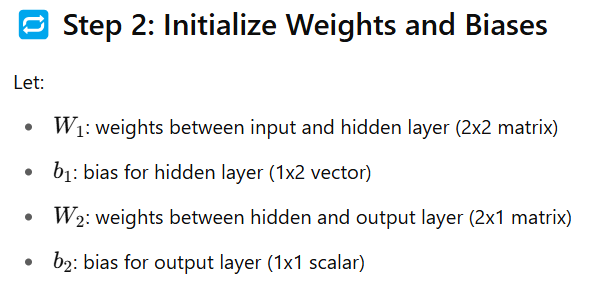

In [27]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

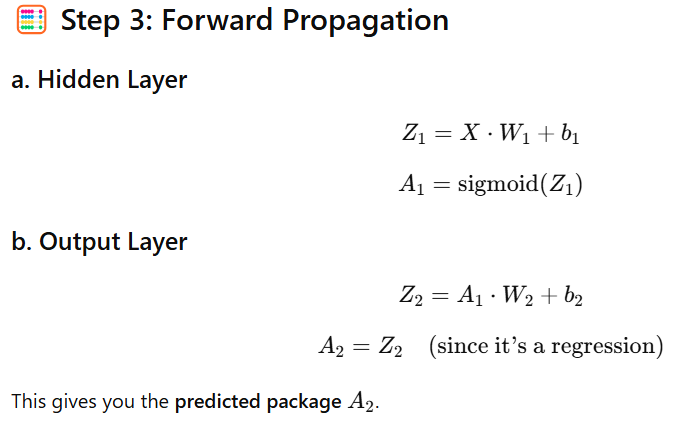

In [28]:
def linear_forward(A_prev, W, b):

  Z = np.dot(W.T, A_prev) + b

  return Z

In [29]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)

  return A,A_prev

predicting for 1st sample / 1st row of data

In [34]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

In [ ]:
y_hat = y_hat[0][0]
y_hat  #prediction for 1st sample data

0.32000000000000006

In [ ]:
A1
 #previous layers output

array([[1.6],
       [1.6]])

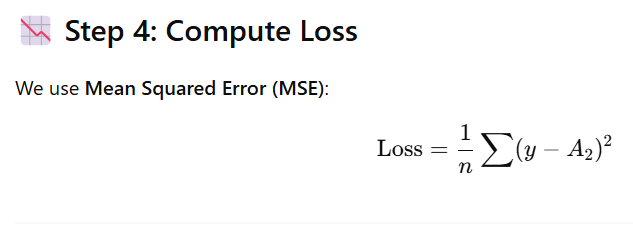

loss for 1st sample

In [40]:
loss_for_1st=(y-y_hat)**2
loss_for_1st

13.542399999999997

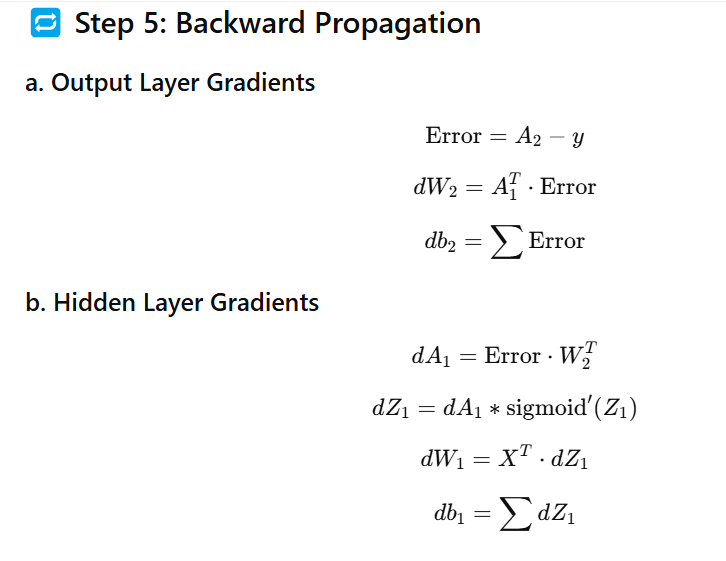
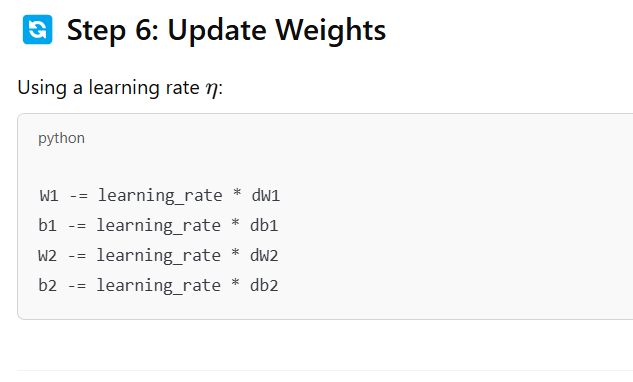

Function to update parameters(w & b)

In [41]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [38]:
#upading parameters after doing pediction on 1st sample data
update_parameters(parameters,y,y_hat,A1,X)

In [42]:
parameters
#we can see parameters are changed/updates

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

for 2nd sample

In [ ]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[1][0]

y_hat,A1 = L_layer_forward(X, parameters)
#forward propogation

In [44]:
update_parameters(parameters,y,y_hat,A1,X)
#updates parametrs

In [46]:
parameters
#again we can see for 2nd sample parameters updated

{'W1': array([[0.11458955, 0.1168776 ],
        [0.11458955, 0.1168776 ]]),
 'b1': array([[0.0019667],
        [0.0019667]]),
 'W2': array([[0.12712927],
        [0.12712927]]),
 'b2': array([[0.13612818]])}

similarly, for 3rd sample

In [47]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[2][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10805488, 0.11342479],
        [0.10805488, 0.11342479]]),
 'b1': array([[0.00134248],
        [0.00134248]]),
 'W2': array([[0.118176],
        [0.118176]]),
 'b2': array([[0.129536]])}

In [48]:
#for final student/sample
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[3][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10816809, 0.11960342],
        [0.10816809, 0.11960342]]),
 'b1': array([[0.00163362],
        [0.00163362]]),
 'W2': array([[0.122644],
        [0.122644]]),
 'b2': array([[0.135964]])}

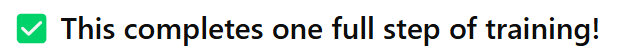

Now, we are doing it for 5 epochs

In [49]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729625
Epoch -  4 Loss -  3.252093863403161
Epoch -  5 Loss -  1.3407132589299964


{'W1': array([[0.26507636, 0.38558861],
        [0.27800387, 0.40980287]]),
 'b1': array([[0.02749056],
        [0.02974394]]),
 'W2': array([[0.41165744],
        [0.48302736]]),
 'b2': array([[0.48646246]])}